In [446]:
import matplotlib.pyplot as plt
import numpy as np
import random
import imageio
import collections

In [447]:
MIN_N = 0
MAX_N = 4
DIM = 10
CHANGE_COORDS = [(1, 0), (-1, 0), (0, 1), (0, -1)]

przykładowy stan początkowy kratownicy

In [448]:
grid = np.random.randint(MAX_N, size=(DIM, DIM))
print(grid)

[[2 2 3 3 3 0 1 3 1 0]
 [2 0 1 2 2 1 1 3 2 2]
 [2 3 1 3 3 2 1 0 0 1]
 [1 1 1 3 1 3 0 1 2 1]
 [3 3 0 1 3 0 0 3 1 2]
 [1 1 1 1 1 3 2 3 1 3]
 [3 0 1 1 1 0 1 3 3 3]
 [0 3 1 3 2 3 2 3 0 0]
 [2 3 3 1 0 0 1 0 3 0]
 [0 1 0 3 1 2 1 2 2 3]]


funkcja pomocnicza do weryfikacji czy ziarno wysypuje się do kratownicy czy poza nią

In [449]:
def on_board(grid, row, col):
    return 0 <= row < grid.shape[0] and 0 <= col < grid.shape[1]

funkcja uruchamiająca wysypywanie ziaren i dodawanie do kolejki stanów które będą powiększać lawinę

In [450]:
def run_avalenche(queue, grid, row, col, max_n, idx, avalenche_size):
    avalenche_size += 1 
    grid[row][col] = MIN_N
    for i, j in CHANGE_COORDS:
        if on_board(grid, row+i, col+j):
            grid[row+i][col+j] += 1         
            if grid[row+i][col+j] == max_n:
                queue.append((row+i, col+j, idx))
    return queue, grid, avalenche_size

funkcja dodająca stan po rozprzestrzenieniu się lawiny

In [451]:
def add_new_state(grid, states, idx, avalenche_time):
    states.append(grid.astype(np.int8))
    idx += 1   
    avalenche_time += 1
    return idx, avalenche_time

funkcja główna w której inicjalizowana jest kratownica z ziarnami po czym następuje dodawanie ziaren do czasu zainicjalizowania lawiny. Funkcja kończy działanie wraz z zakończeniem rozprzestrzeniania się lawiny.

In [452]:
def generate_avalenche(dim, max_n):
    coords_to_collapse = collections.deque()
    states = []
    avalenche_size = 0
    avalenche_time = 0
    idx = 0
    grid = np.random.randint(max_n, size=(dim, dim))
    while True:
        row = random.randint(0, dim-1)
        col = random.randint(0, dim-1)
        grid[row][col] += 1
        if grid[row][col] == max_n:
            coords_to_collapse, grid, avalenche_size = run_avalenche(coords_to_collapse, grid, row , col, max_n, idx, avalenche_size)
            idx, avalenche_time = add_new_state(grid, states, idx, avalenche_time)
            while coords_to_collapse:
                row, col, state_idx = coords_to_collapse.popleft()
                coords_to_collapse, grid, avalenche_size = run_avalenche(coords_to_collapse, grid, row , col, max_n, idx, avalenche_size)
                if coords_to_collapse:
                    if state_idx != coords_to_collapse[0][2]:
                        idx, avalenche_time = add_new_state(grid, states, idx, avalenche_time)
                else:
                    idx, avalenche_time = add_new_state(grid, states, idx, avalenche_time)                   
            break
    return states, avalenche_size, avalenche_time


stan kratownicy

(-0.5, 9.5, 9.5, -0.5)

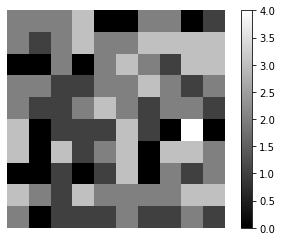

In [453]:
states, _, _ = generate_avalenche(DIM, MAX_N)
plt.imshow(states[1], cmap = "gray")
plt.colorbar()
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

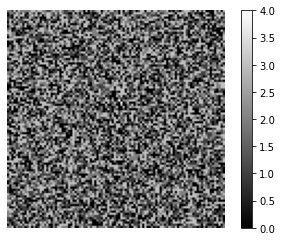

In [467]:
states, _, _ = generate_avalenche(100, MAX_N)
plt.imshow(states[1], cmap = "gray")
plt.colorbar()
plt.axis('off')

Uruchomienie procesu wysypywania ziaren i zapisanie lawiny do GIFa. 
Tablice symbolizujące stany są powiększane w celu otrzymania dobrej jakości GIFa

In [ ]:
states, avalenche_size, avalenche_time = generate_avalenche(10, 4)
bigegr_states = [state.repeat(50, axis=0).repeat(50, axis=1) for state in states]
imageio.mimsave(r'lawina.gif', bigegr_states, 'GIF', duration=len(states)/40)

uruchomienie procesu wysypywania ziaren dla różnych stanów początkowych i zapisanie rozmiaru lawiny dla każdego z uruchomionych procesów

In [456]:
list_of_sizes = []
list_of_times = []
for i in range(10000):
    _, avalenche_size, avalenche_time = generate_avalenche(DIM, MAX_N)
    list_of_sizes.append(avalenche_size)
    list_of_times.append(avalenche_time)

Zliczenie ilości wystąpień kolejnych rozmiarów lawin, zamiana wielkości do skali logarytmicznej i pokazanie danych na wykresie 

Text(0, 0.5, 'number of avalenches')

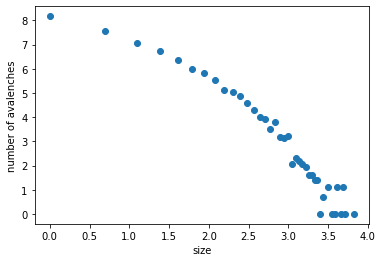

In [457]:
size, n = np.unique(list_of_sizes, return_counts=True)
size = np.log(size)
n = np.log(n)
plt.scatter(size, n)
plt.xlabel('size')
plt.ylabel('number of avalenches')

Dopasowanie prostej i obliczenie współczynnika nachylenia

współczynnik nachylenia prostej: -2.561475853096559


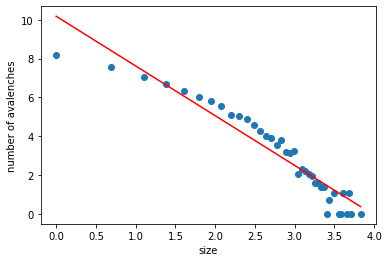

In [458]:
a, b = np.polyfit(size, n, 1)
plt.scatter(size, n)
plt.plot(size, a*size+b, 'r')
plt.xlabel('size')
plt.ylabel('number of avalenches')
print(f"współczynnik nachylenia prostej: {a}")

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


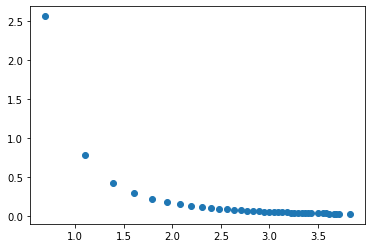

In [459]:
plt.scatter(size, size ** a)

wyszukanie przybliżonej wartości t od której występują długie lawiny o rozmiarze kratownicy

In [460]:
sizes = np.array(list_of_sizes)
times = np.array(list_of_times)
new_times = times[sizes >= DIM]
print(f"Najmniejsza wartość t dla dużych lawin: {np.min(new_times)}")

Najmniejsza wartość t dla dużych lawin: 3


Text(0, 0.5, 'number of avalenches')

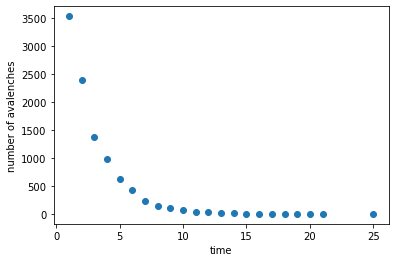

In [461]:
time, n_t = np.unique(list_of_times, return_counts=True)
plt.scatter(time, n_t)
plt.xlabel('time')
plt.ylabel('number of avalenches')

wizualizacja przykładowego stanu kratownicy

(-0.5, 9.5, 9.5, -0.5)

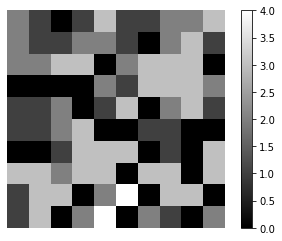

In [462]:
states, _, _ = generate_avalenche(DIM, MAX_N)
plt.imshow(states[1], cmap = "gray")
plt.colorbar()
plt.axis('off')

sprawdzenie czy wykładnik α zmienia się po zwiększeniu maksymalnej wysokości stosu

In [471]:
max_n = [4, 6, 10]
for n in max_n:
    list_of_sizes = []
    for i in range(10000):
        _, avalenche_size, _ = generate_avalenche(DIM, n)
        list_of_sizes.append(avalenche_size)
    size, n_s = np.unique(list_of_sizes, return_counts=True)
    size = np.log(size)
    n_s = np.log(n_s)
    a, b = np.polyfit(size, n_s, 1)
    print(f'a for max stack size = {n}: {a}')

a for max stack size = 4: -2.52635942327797
a for max stack size = 6: -2.954512587677185
a for max stack size = 10: -3.900161298639806


Z przeprowadzonej obserwacji wynika, że wykładnik α zmniejsza się po zwiększeniu maksymalnej wysokości stosu